### GROUP 1 WORK 

- GERARD PAUL IRAO
- TROJAN PATREUS FERRERAS
- AARON JOSHUA BLASURCA

## Import Libraries

In [14]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # Prevent Warning Messages
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import seaborn as sns
import os

C:\Users\Gerard Irao\AppData\Local\Temp\ipykernel_4132\2740430251.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Process CSVs

In [15]:
# Create File Path
file_path = "processed" # file folder of the 4 csv files 
file_list = os.listdir(file_path)

# show file list
file_list

['phone-accel.csv', 'phone-gyro.csv', 'watch-accel.csv', 'watch-gyro.csv']

In [16]:
# Specify the folder path
folder_path = "processed"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Initialize an empty DataFrame
df = pd.DataFrame()

# Append all files together
for file in file_list:
    # Construct the full path to the file
    file_path = os.path.join(folder_path, file)

    # Read the content of the file and append it to the DataFrame
    df_temp = pd.read_csv(file_path)
    df = pd.concat([df, df_temp], ignore_index=True)


# Reset df 
df = df.reset_index(drop= True)


# Display the combined DataFrame
df


,ID,activity,timestamp,x,y,z,meter,device
0,1600,A,252207666810782,-0.364761,8.793503,1.055084,accel,phone
1,1600,A,252207717164786,-0.879730,9.768784,1.016998,accel,phone
2,1600,A,252207767518790,2.001495,11.109070,2.619156,accel,phone
3,1600,A,252207817872794,0.450623,12.651642,0.184555,accel,phone
4,1600,A,252207868226798,-2.164352,13.928436,-4.422485,accel,phone
...,...,...,...,...,...,...,...,...
15630421,1650,S,2426184371437252,-2.856065,2.057101,0.853933,gyro,watch
15630422,1650,S,2426184421424592,-2.911458,1.817417,1.281104,gyro,watch
15630423,1650,S,2426184471411932,-3.015854,1.550036,2.057682,gyro,watch
15630424,1650,S,2426184521399272,-3.218254,1.595842,3.018550,gyro,watch


Based on the documentation there is 15,630,426 total rows which proves that all the txt files is read

# Data Cleaning

In [17]:
# Remove Irrelevant Activities

# List of values to keep
allowed_values = ['A', 'B', 'C', 'D', 'E']

# Filtering the DataFrame
df = df[df['activity'].isin(allowed_values)]

# Reset df 
df = df.reset_index(drop= True)


# Display the combined DataFrame
df

,ID,activity,timestamp,x,y,z,meter,device
0,1600,A,252207666810782,-0.364761,8.793503,1.055084,accel,phone
1,1600,A,252207717164786,-0.879730,9.768784,1.016998,accel,phone
2,1600,A,252207767518790,2.001495,11.109070,2.619156,accel,phone
3,1600,A,252207817872794,0.450623,12.651642,0.184555,accel,phone
4,1600,A,252207868226798,-2.164352,13.928436,-4.422485,accel,phone
...,...,...,...,...,...,...,...,...
4347885,1650,E,2425530011432855,-0.248304,-0.548543,-0.226238,gyro,watch
4347886,1650,E,2425530061425505,-0.268544,-0.394079,-0.181497,gyro,watch
4347887,1650,E,2425530111418155,-0.255761,-0.246007,-0.199606,gyro,watch
4347888,1650,E,2425530161410805,-0.322873,-0.096870,-0.235825,gyro,watch


In [18]:
# Clarifying 'activity' column

# Mapping of old values to new values
activity_mapping = {'A': 'walking', 'B': 'jogging', 'C': 'stairs', 'D': 'sitting', 'E': 'standing'}

# Replace elements in the 'activity' column
df['activity'] = df['activity'].replace(activity_mapping)
df

,ID,activity,timestamp,x,y,z,meter,device
0,1600,walking,252207666810782,-0.364761,8.793503,1.055084,accel,phone
1,1600,walking,252207717164786,-0.879730,9.768784,1.016998,accel,phone
2,1600,walking,252207767518790,2.001495,11.109070,2.619156,accel,phone
3,1600,walking,252207817872794,0.450623,12.651642,0.184555,accel,phone
4,1600,walking,252207868226798,-2.164352,13.928436,-4.422485,accel,phone
...,...,...,...,...,...,...,...,...
4347885,1650,standing,2425530011432855,-0.248304,-0.548543,-0.226238,gyro,watch
4347886,1650,standing,2425530061425505,-0.268544,-0.394079,-0.181497,gyro,watch
4347887,1650,standing,2425530111418155,-0.255761,-0.246007,-0.199606,gyro,watch
4347888,1650,standing,2425530161410805,-0.322873,-0.096870,-0.235825,gyro,watch


## Feature Engineering

In [19]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,ID,activity,timestamp,x,y,z,meter,device
0,1600,walking,252207666810782,-0.364761,8.793503,1.055084,accel,phone
1,1600,walking,252207717164786,-0.879730,9.768784,1.016998,accel,phone
2,1600,walking,252207767518790,2.001495,11.109070,2.619156,accel,phone
3,1600,walking,252207817872794,0.450623,12.651642,0.184555,accel,phone
4,1600,walking,252207868226798,-2.164352,13.928436,-4.422485,accel,phone


In [20]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID           0
activity     0
timestamp    0
x            0
y            0
z            0
meter        0
device       0
dtype: int64


In [21]:
categorical_count_list = df["activity"].value_counts().keys().tolist()

action_count_values = df["activity"].value_counts().tolist()

# Create a bar chart
fig = go.Figure(data=[go.Bar(x=categorical_count_list, y=action_count_values, marker_color= ["blue","orange","green","red","violet"])])

# Update layout
fig.update_layout(title='Distribution of Activity',
                  xaxis_title='Actions',
                  yaxis_title='Count',
                  width = 900,
                  height = 700)

# Show the plot
fig.show()

In [22]:
categorical_count_list = df["device"].value_counts().keys().tolist()


device_count_arr = df["device"].value_counts().tolist()


# Create a bar chart
fig = go.Figure(data=[go.Bar(x=categorical_count_list, y=device_count_arr, marker_color = ["blue","orange"] )])

# Update layout
fig.update_layout(title='Distribution of Device',
                  xaxis_title='Device',
                  yaxis_title='Count',                  
                  width = 900,
                  height = 700)

# Show the plot
fig.show()

In [23]:
categorical_count_list = df["meter"].value_counts().keys().tolist()


meter_count_list = df["meter"].value_counts().tolist()


# Create a bar chart
fig = go.Figure(data=[go.Bar(x=categorical_count_list, y=meter_count_list, marker_color = ["blue","orange"] )])

# Update layout
fig.update_layout(title='Distribution of Meter',
                  xaxis_title='Meter',
                  yaxis_title='Count',                  
                  width = 900,
                  height = 700)

# Show the plot
fig.show()

# EDA Findings

Overall there is difference betweeen the total count of meter, device, and actions that can have significant implication when we put the data in the machine learning model

## Data Storytelling

In [24]:
# Separate by device and meter
accel_phone = df[(df['device'] == "phone") & (df['meter'] == 'accel')]
gyro_phone = df[(df['device'] == "phone") & (df['meter'] == 'gyro')]
gyro_watch = df[(df['device'] == "watch") & (df['meter'] == 'gyro')]
accel_watch = df[(df['device'] == "watch") & (df['meter'] == 'accel')]

# Set Frames
Fs = 20

In [25]:
# Indexing Activities
accel_phone_activities = accel_phone['activity'].value_counts().index
gyro_phone_activities = gyro_phone['activity'].value_counts().index
accel_watch_activities = accel_watch['activity'].value_counts().index
gyro_watch_activities = gyro_watch['activity'].value_counts().index

In [26]:
# Define Plotting Functions
def plot_activity(activity, meter_device):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize =(15,7), sharex = True)
    plot_axis(ax0, meter_device['timestamp'], meter_device['x'], 'X-axis')
    plot_axis(ax1, meter_device['timestamp'], meter_device['y'], 'Y-axis')
    plot_axis(ax2, meter_device['timestamp'], meter_device['z'], 'Z-axis')
    plt.subplots_adjust(hspace = 0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top = 0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y)-np.std(y), max(y)+np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

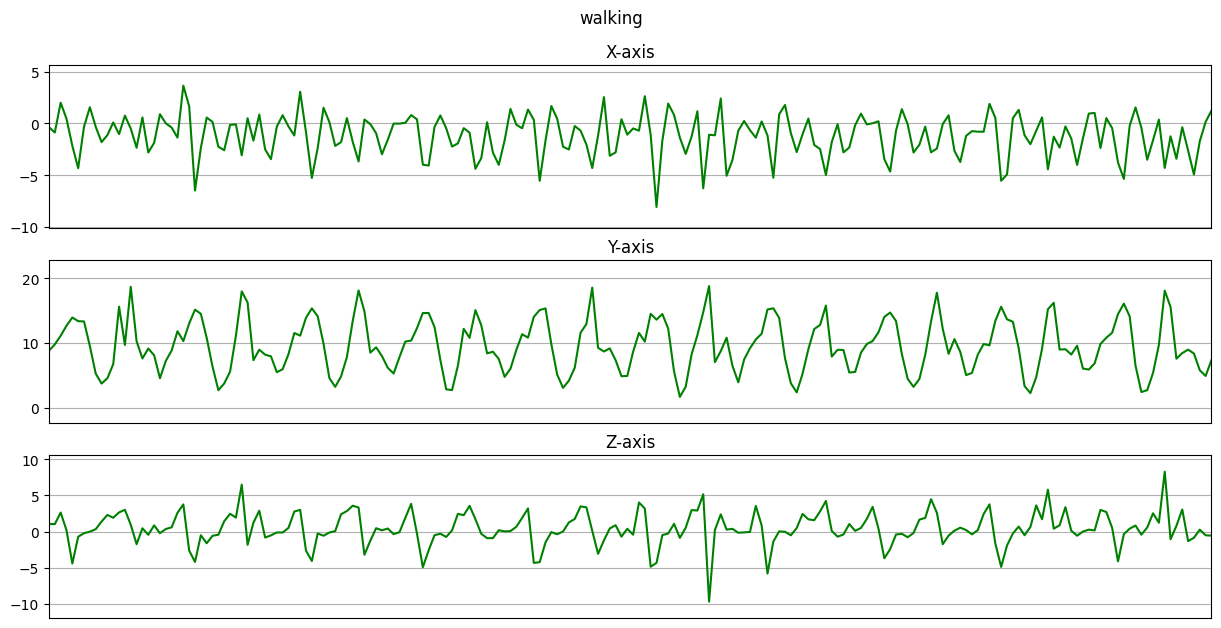

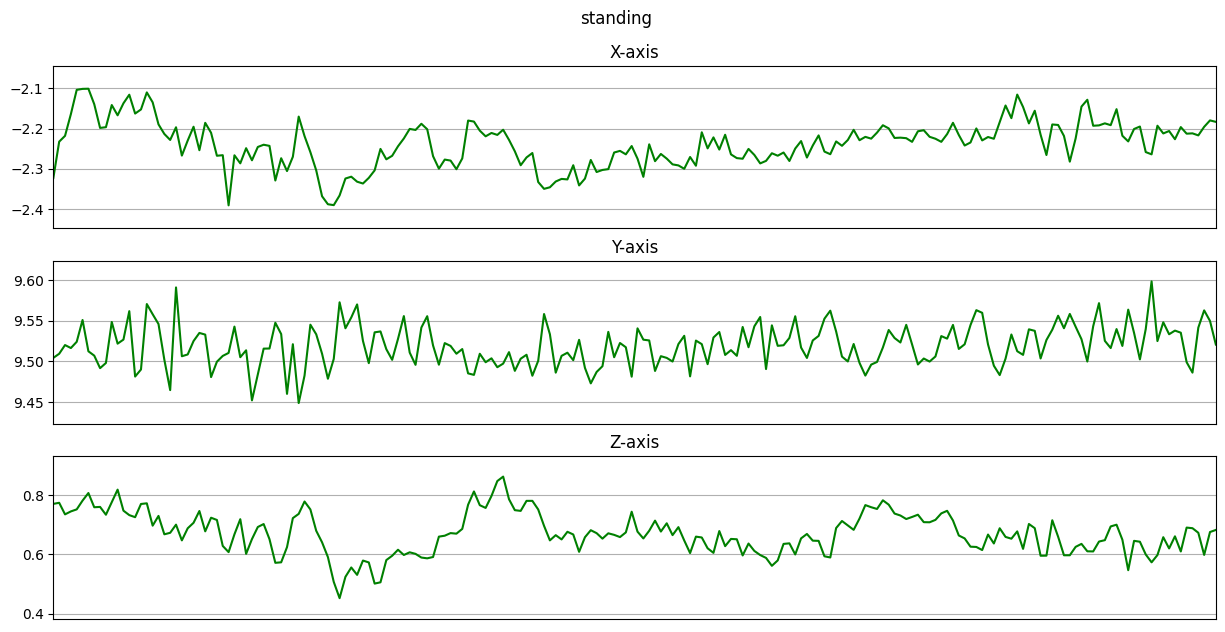

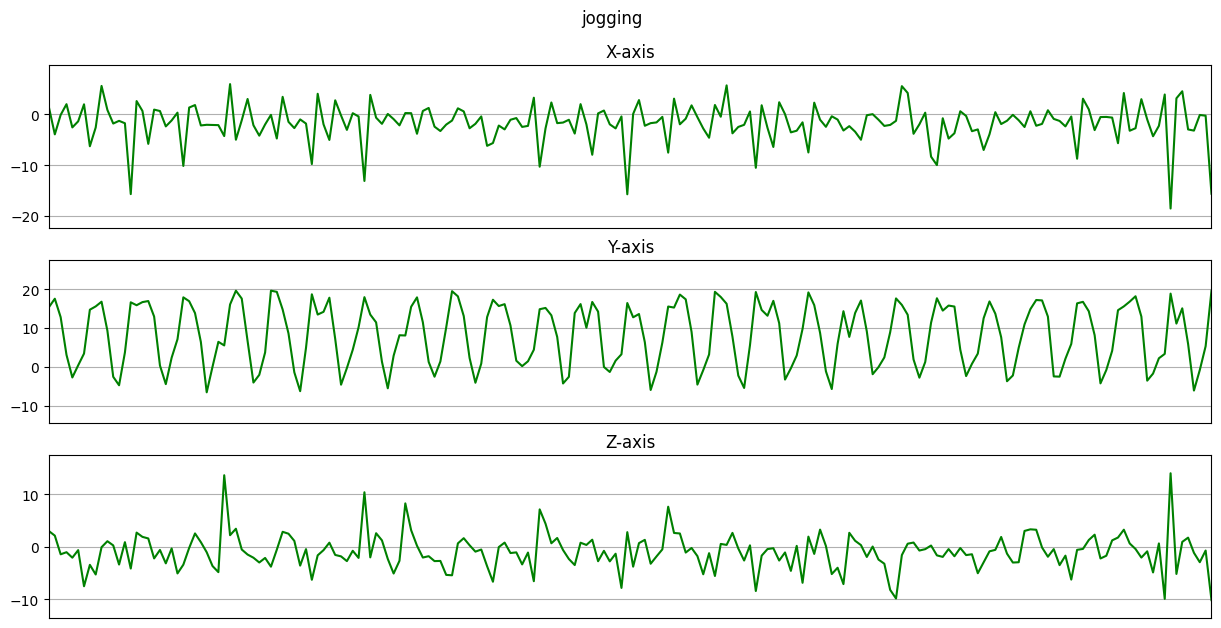

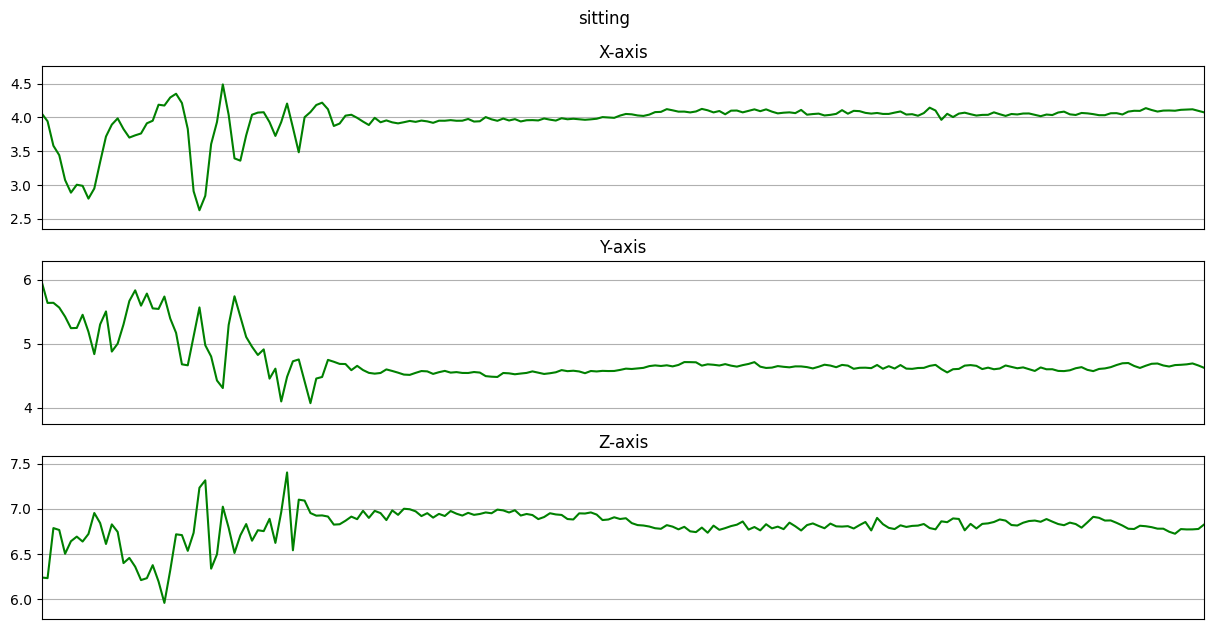

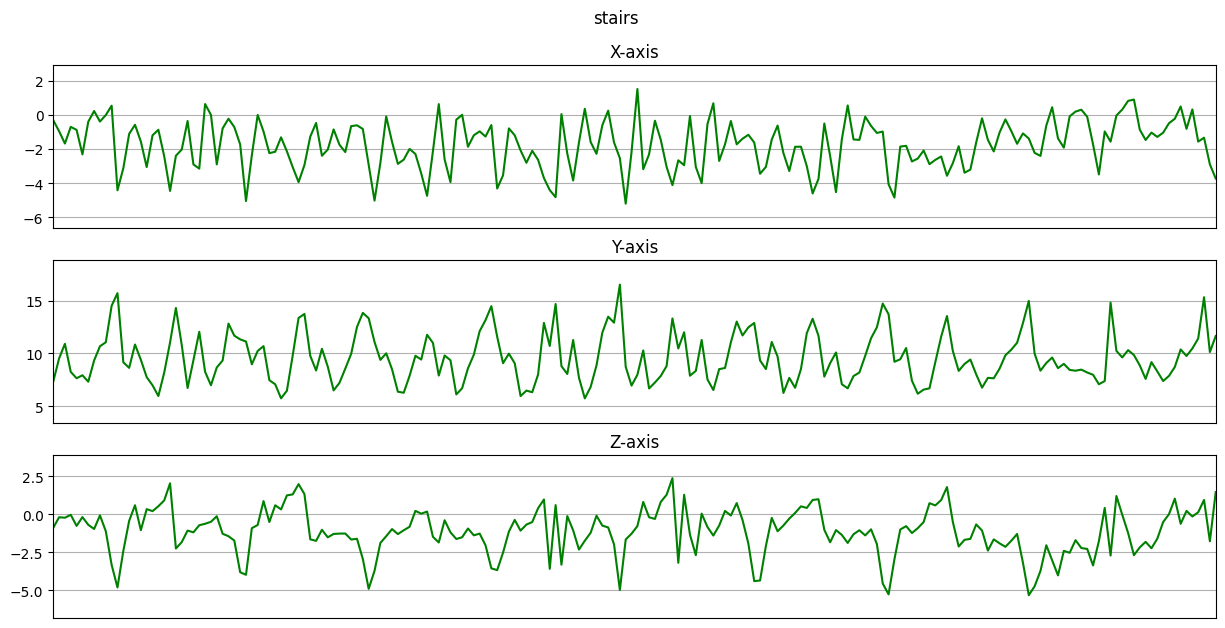

In [27]:
# Plotting Accel_Phone Activities
for activity in accel_phone_activities:
    data_for_plot = accel_phone[(accel_phone['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

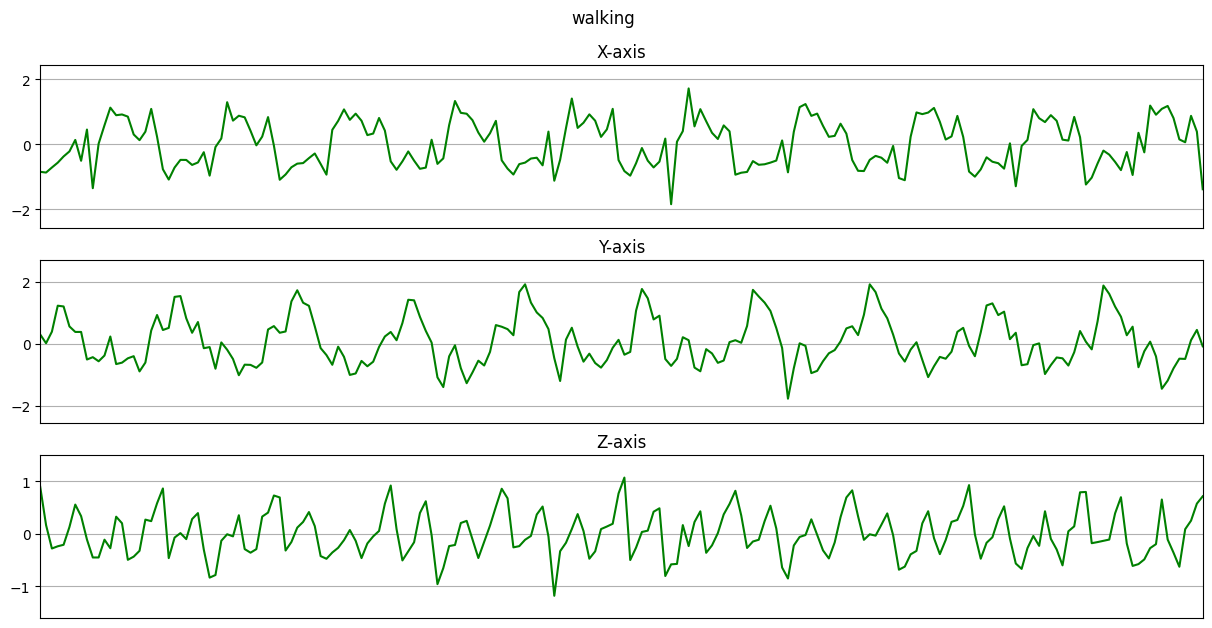

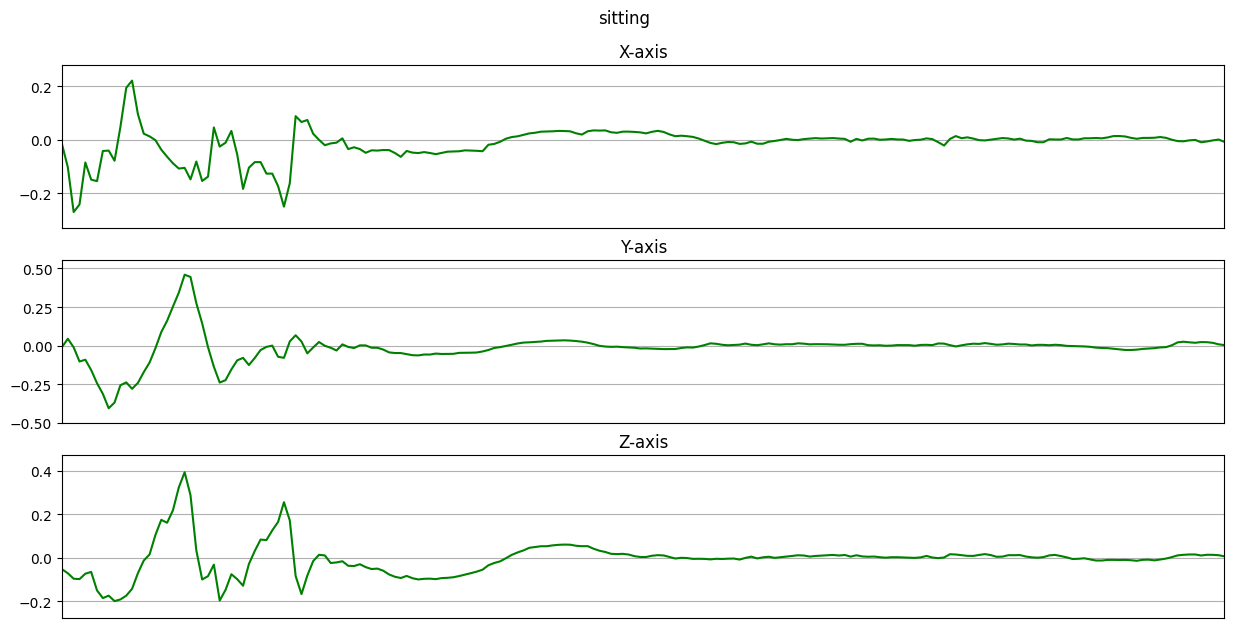

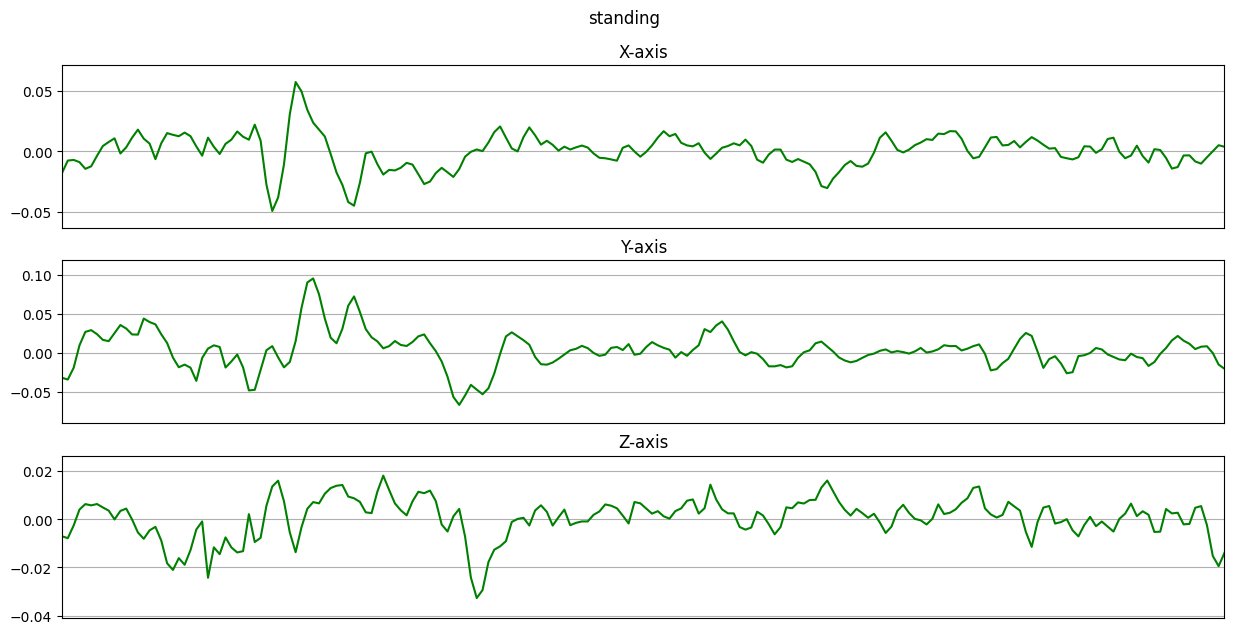

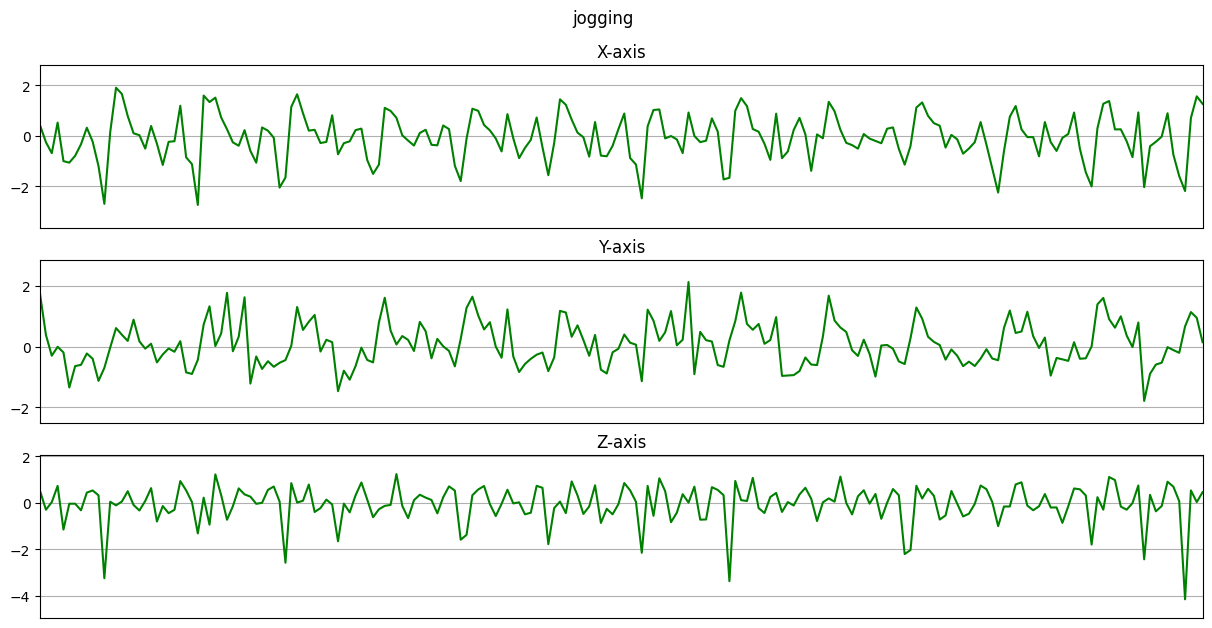

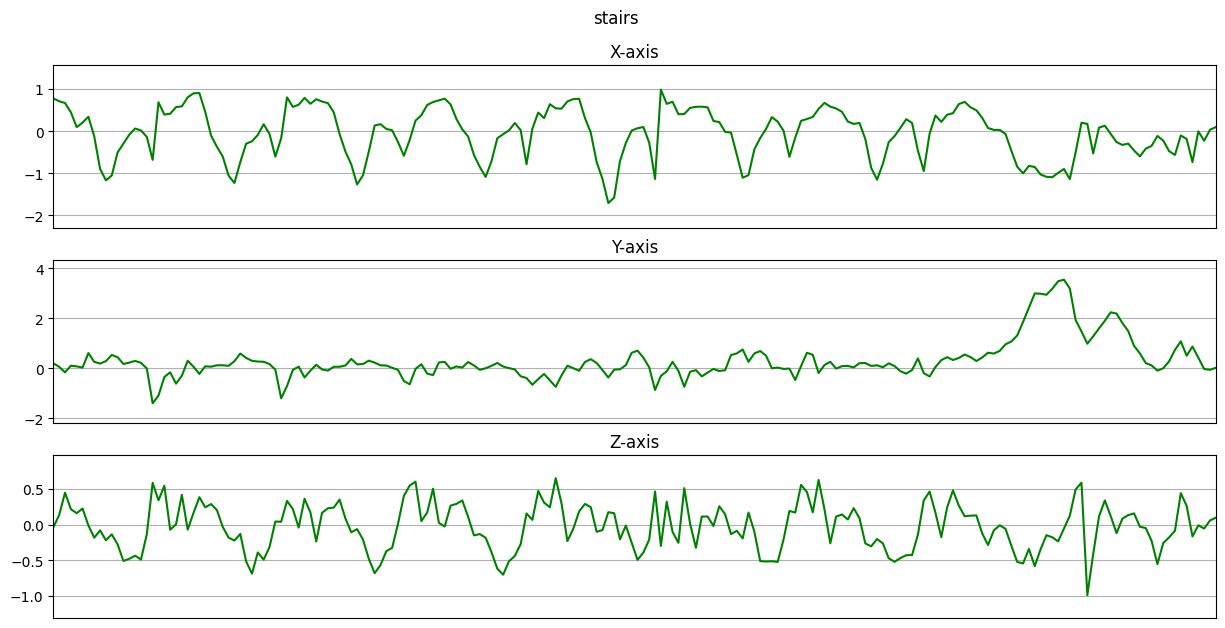

In [28]:
# Plotting Gyro_Phone Activities
for activity in gyro_phone_activities:
    data_for_plot = gyro_phone[(gyro_phone['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

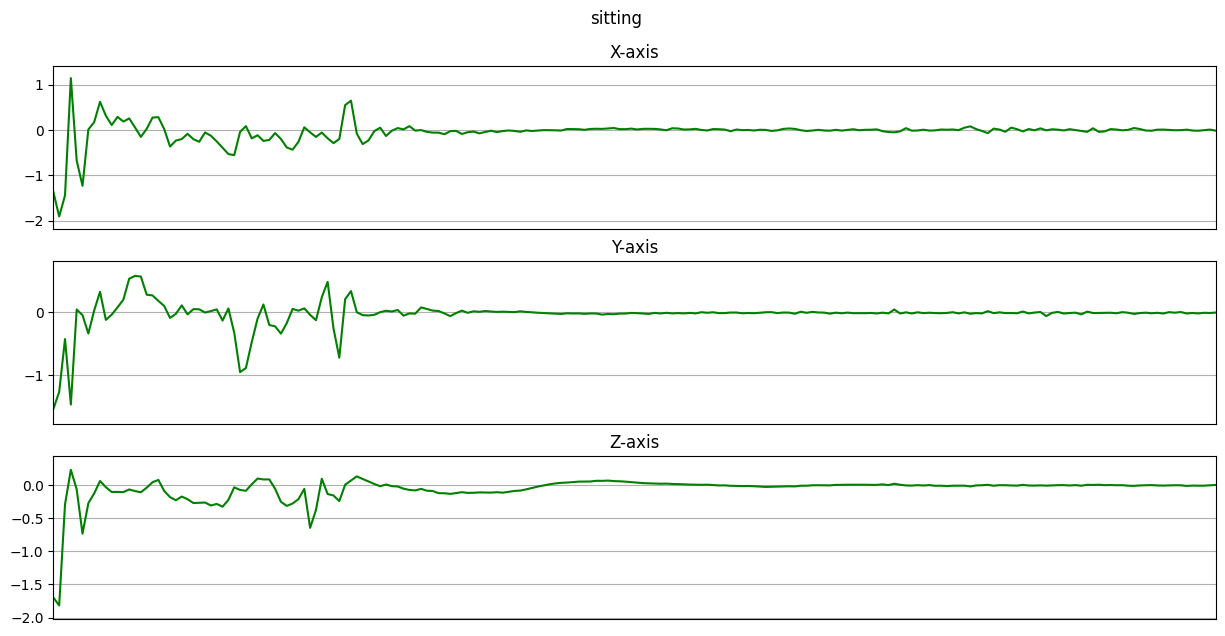

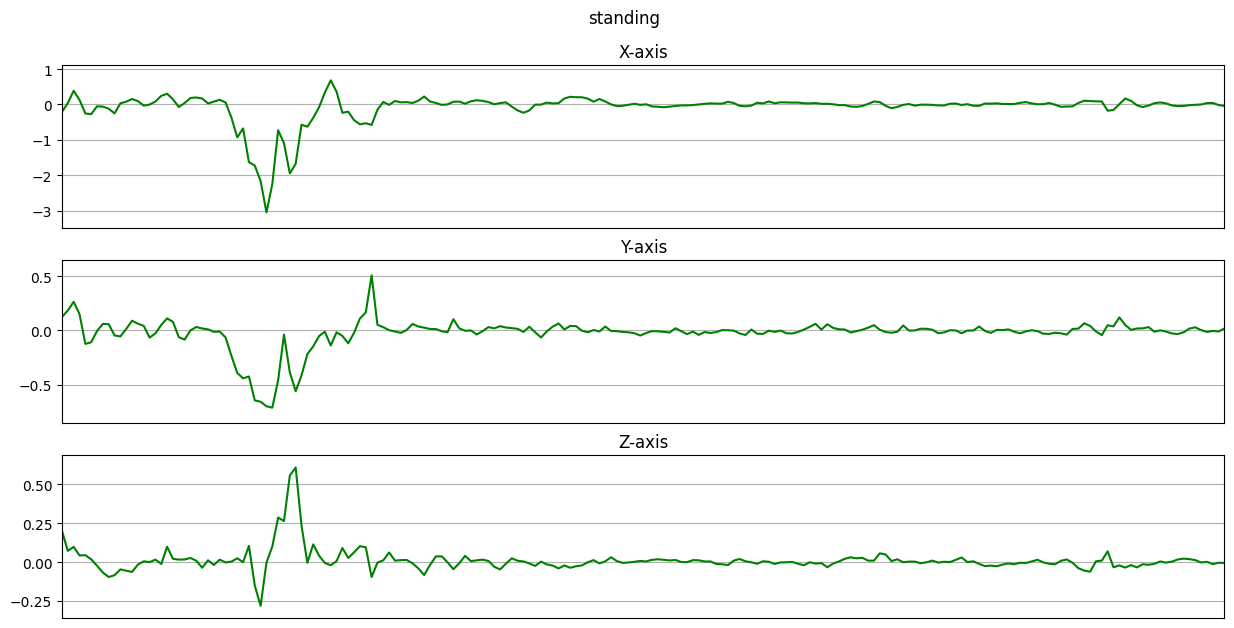

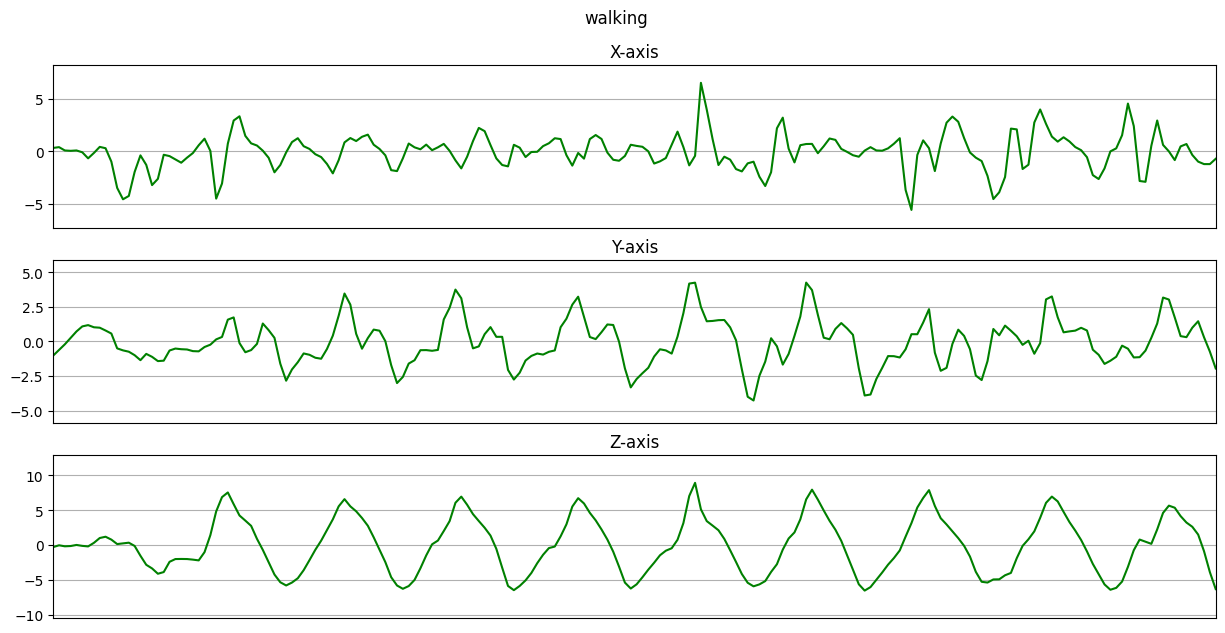

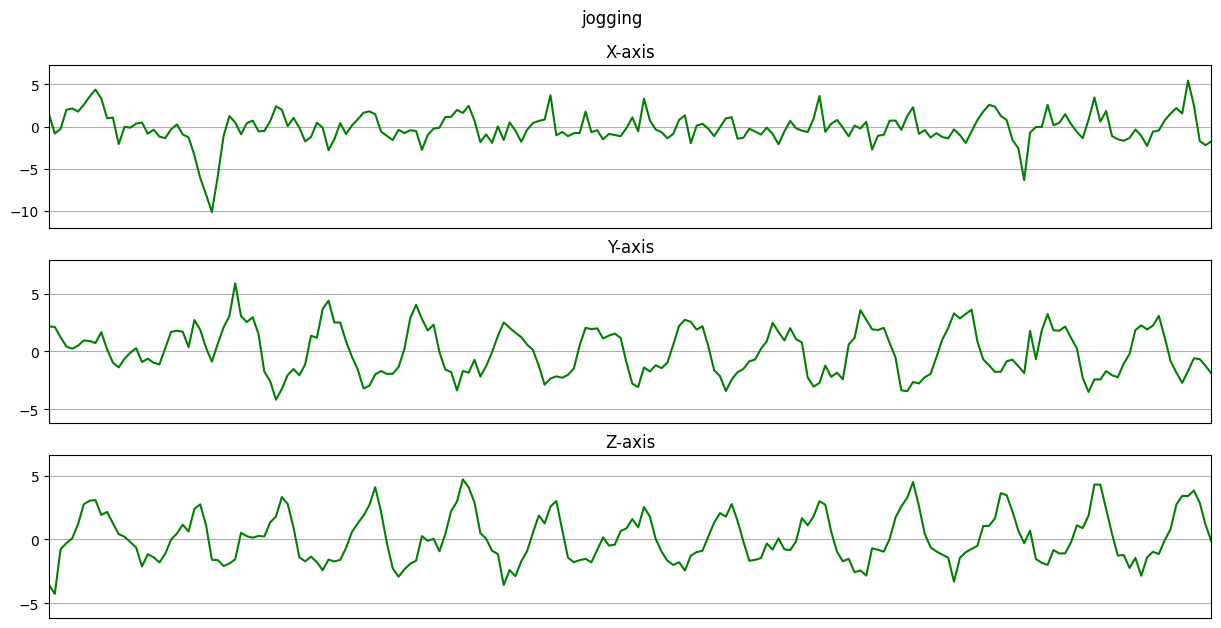

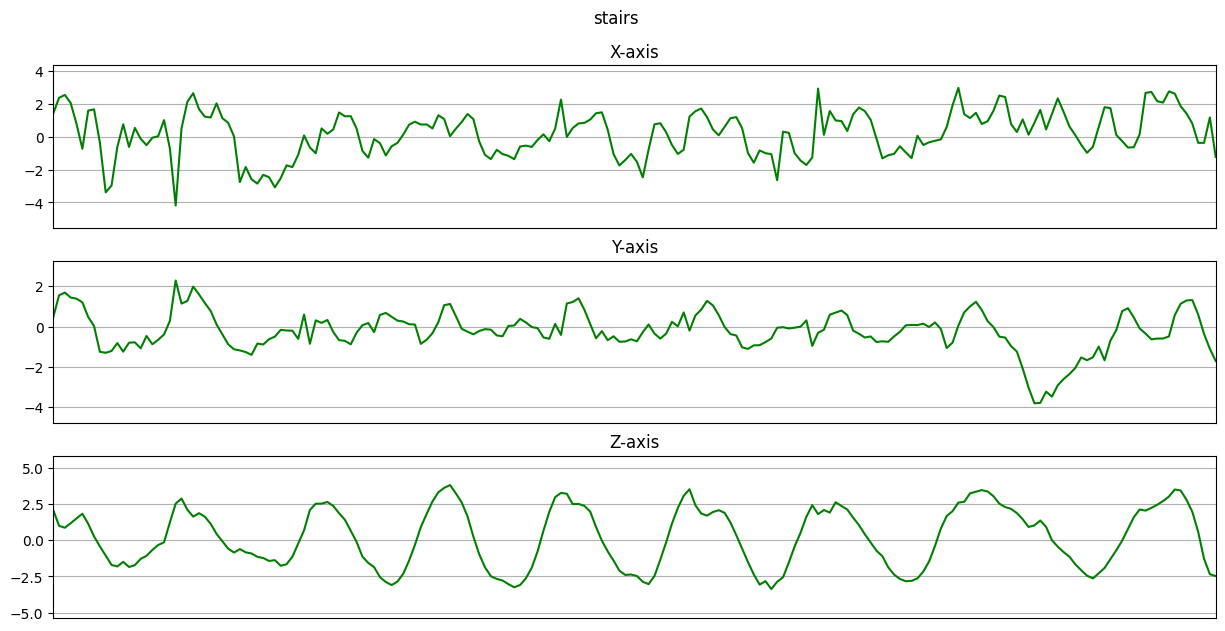

In [29]:
# Plotting Gyro_Watch Activities
for activity in gyro_watch_activities:
    data_for_plot = gyro_watch[(gyro_watch['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

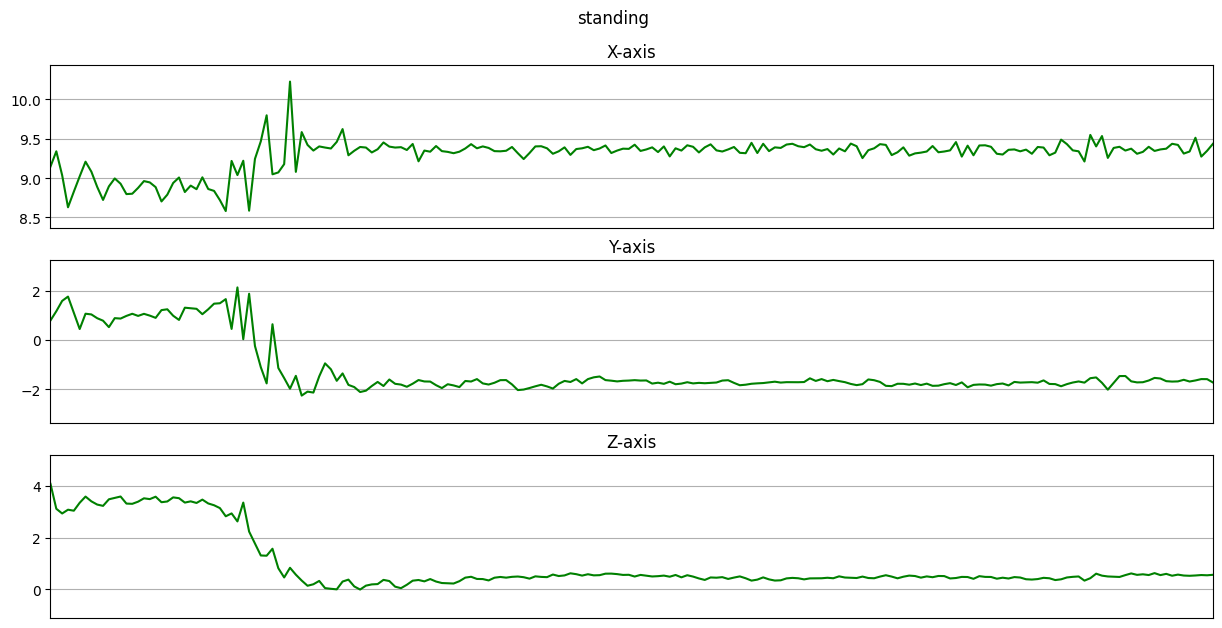

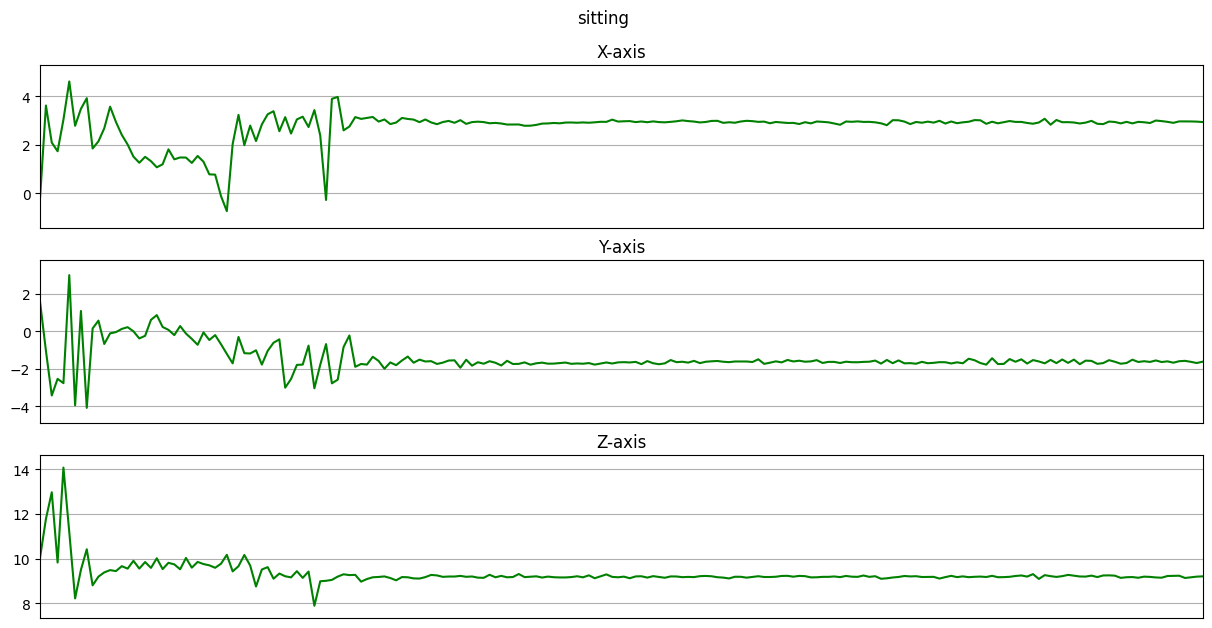

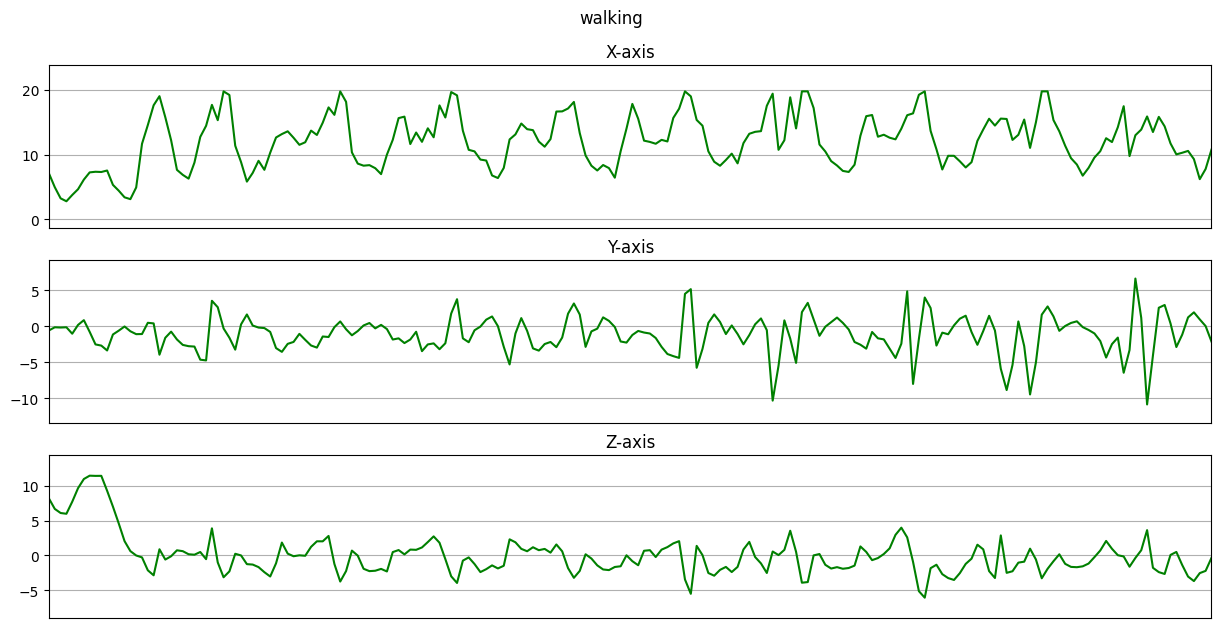

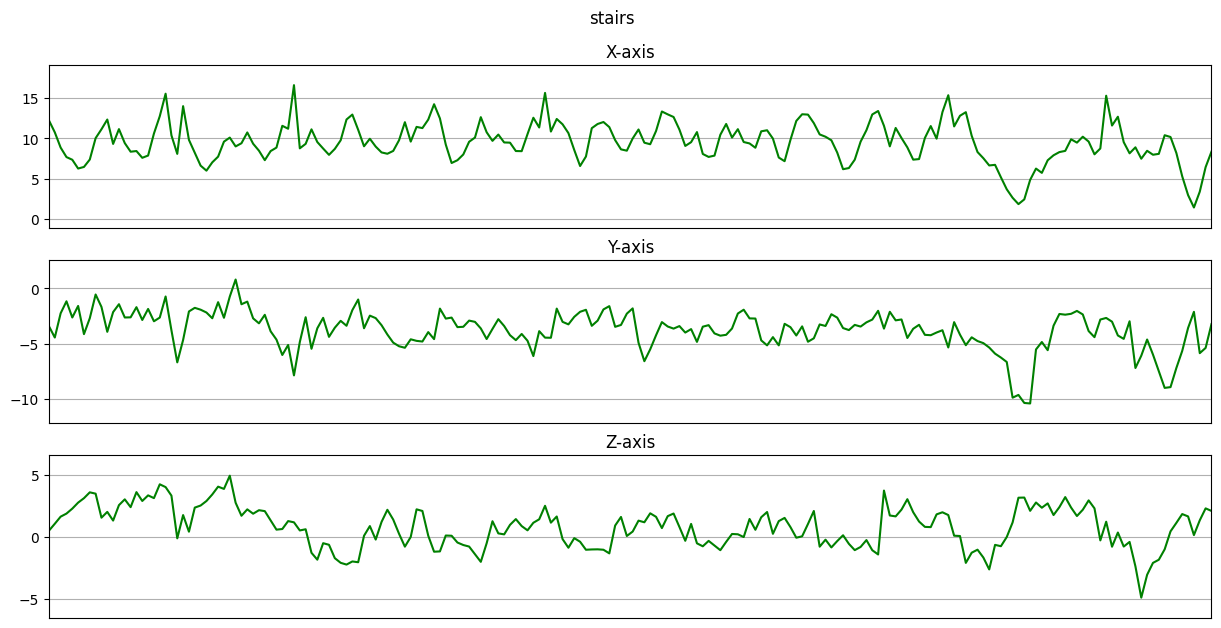

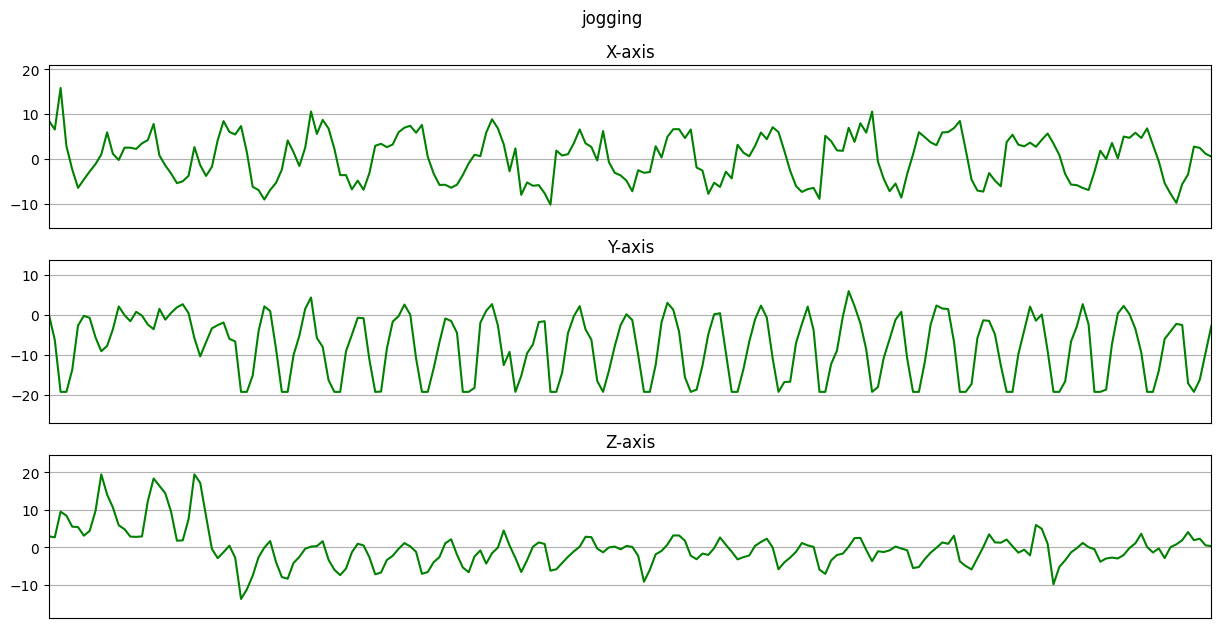

In [30]:
# Plotting Accel_Watch Activities
for activity in accel_watch_activities:
    data_for_plot = accel_watch[(accel_watch['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

# Data Story Telling Findings

we have found that in terms of the 5 activities of walking, standing, sitting, jogging, and stairs there is a certain pattern when it is plotted into a time series, the pattern can be crucial into making a model in determining what actions are based on the x,y,z axis 

we also found that in each meter-device combination, there is difference xyz pattterns which also takes into conderation on what device and meter is used in determing a action

# Machine Learning Model

## Import Libraries

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel

## Data Pre-Processing

In [32]:
# One-hot encode categorical features
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['device', 'meter'])
    ],
    remainder='passthrough'
)

X = encoder.fit_transform(df[['device', 'meter']])
X = np.concatenate([X, df[['x', 'y', 'z']].values], axis=1)
y = df['activity']

In [33]:
# show X 
X

array([[ 1.0000000e+00,  0.0000000e+00,  1.0000000e+00, ...,
        -3.6476135e-01,  8.7935030e+00,  1.0550842e+00],
       [ 1.0000000e+00,  0.0000000e+00,  1.0000000e+00, ...,
        -8.7973020e-01,  9.7687840e+00,  1.0169983e+00],
       [ 1.0000000e+00,  0.0000000e+00,  1.0000000e+00, ...,
         2.0014954e+00,  1.1109070e+01,  2.6191560e+00],
       ...,
       [ 0.0000000e+00,  1.0000000e+00,  0.0000000e+00, ...,
        -2.5576120e-01, -2.4600737e-01, -1.9960631e-01],
       [ 0.0000000e+00,  1.0000000e+00,  0.0000000e+00, ...,
        -3.2287285e-01, -9.6870355e-02, -2.3582532e-01],
       [ 0.0000000e+00,  1.0000000e+00,  0.0000000e+00, ...,
        -3.4098235e-01, -7.3881415e-03, -2.2836846e-01]])

In [34]:
# show Y
y 

0           walking
1           walking
2           walking
3           walking
4           walking
             ...   
4347885    standing
4347886    standing
4347887    standing
4347888    standing
4347889    standing
Name: activity, Length: 4347890, dtype: object

In [35]:
# Split the Dataa
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [48]:
X_train

array([[  1.        ,   0.        ,   1.        , ...,   2.2511482 ,
          9.455301  ,   0.14604631],
       [  1.        ,   0.        ,   0.        , ...,   0.2114563 ,
          0.30941772,   0.80867004],
       [  1.        ,   0.        ,   1.        , ...,   3.307522  ,
          7.7143583 ,   5.992339  ],
       ...,
       [  1.        ,   0.        ,   1.        , ...,  -9.818817  ,
         -0.5982971 ,   1.087738  ],
       [  1.        ,   0.        ,   0.        , ...,  -1.0661047 ,
          0.22665845,  -0.5955427 ],
       [  1.        ,   0.        ,   1.        , ...,  16.59372   ,
        -16.493347  ,  -0.04171753]])

## Model Creation and Evaluation

In [36]:
# Model Selection
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

In [37]:
# show model
model

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [38]:
# Feature Selection
feature_selector = SelectFromModel(model, threshold='median')

feature_selector

SelectFromModel(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                 random_state=42),
                threshold='median')

In [39]:
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

In [41]:
# show X trained tranformed
X_train_selected

array([[  1.        ,   2.2511482 ,   9.455301  ,   0.14604631],
       [  0.        ,   0.2114563 ,   0.30941772,   0.80867004],
       [  1.        ,   3.307522  ,   7.7143583 ,   5.992339  ],
       ...,
       [  1.        ,  -9.818817  ,  -0.5982971 ,   1.087738  ],
       [  0.        ,  -1.0661047 ,   0.22665845,  -0.5955427 ],
       [  1.        ,  16.59372   , -16.493347  ,  -0.04171753]])

In [42]:
# show X test transformed
X_test_selected

array([[ 0.0000000e+00, -2.2914317e-01,  7.7855650e-02,  3.7257360e-02],
       [ 0.0000000e+00,  1.2293152e+00,  2.4501082e-02,  1.1824436e-01],
       [ 1.0000000e+00,  5.0628386e+00, -4.8295536e+00,  6.8083615e+00],
       ...,
       [ 1.0000000e+00,  3.0568237e+00,  1.1438293e+01, -2.1559600e+00],
       [ 0.0000000e+00, -7.9229050e-03, -5.1598744e-03, -2.6658240e-04],
       [ 0.0000000e+00,  1.0962490e+00,  3.1626555e-01,  3.0716677e+00]])

In [43]:
# Model Training
model.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [44]:
# Model Evaluation
y_pred = model.predict(X_test_selected)

In [45]:
# show predictions
y_pred

array(['standing', 'stairs', 'sitting', ..., 'walking', 'sitting',
       'walking'], dtype=object)

In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.5766072738730741

Classification Report:
               precision    recall  f1-score   support

     jogging       0.59      0.59      0.59    172423
     sitting       0.75      0.74      0.74    175316
      stairs       0.40      0.43      0.41    168120
    standing       0.66      0.74      0.70    176119
     walking       0.47      0.38      0.42    177600

    accuracy                           0.58    869578
   macro avg       0.57      0.58      0.57    869578
weighted avg       0.57      0.58      0.57    869578



# Improving the Model

In [66]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [95]:
new_model = lgb.LGBMClassifier(n_estimators= 200 , num_leaves= 500, learning_rate= 0.1, n_jobs= 100)

In [96]:
new_model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 3478312, number of used features: 7
[LightGBM] [Info] Start training from score -1.617817
[LightGBM] [Info] Start training from score -1.603631
[LightGBM] [Info] Start training from score -1.642394
[LightGBM] [Info] Start training from score -1.594024
[LightGBM] [Info] Start training from score -1.590218


LGBMClassifier(n_estimators=200, n_jobs=100, num_leaves=500)

In [97]:
# Make predictions on the test set
new_y_pred = new_model.predict(X_test)



In [98]:
accuracy = accuracy_score(y_test, new_y_pred)
classification_rep = classification_report(y_test,new_y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.6406314327179391

Classification Report:
               precision    recall  f1-score   support

     jogging       0.64      0.63      0.64    172423
     sitting       0.83      0.79      0.81    175316
      stairs       0.46      0.46      0.46    168120
    standing       0.76      0.81      0.78    176119
     walking       0.50      0.51      0.51    177600

    accuracy                           0.64    869578
   macro avg       0.64      0.64      0.64    869578
weighted avg       0.64      0.64      0.64    869578

